<a href="https://colab.research.google.com/github/ayushtyagi04/data-analytics-projects/blob/main/AyushTyagi_IPLStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import statsmodels.api as sm
from sklearn.utils import resample
from scipy.stats import shapiro , mannwhitneyu
import warnings
warnings.filterwarnings("ignore")

In [ ]:
match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')
match_info_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_info_data.csv')

In [ ]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [ ]:
match_data.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
243812,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982
243813,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243814,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243815,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243816,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.2,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,caught,SB Joshi,NaN,NaN,335982


In [ ]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [ ]:
match_data.isnull().sum()

,0
match_id,0
season,0
start_date,0
venue,0
innings,0
ball,0
batting_team,0
bowling_team,0
striker,0
non_striker,0


In [ ]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [ ]:
match_info_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin
1023,335982,2007/08,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,AM Saheba


In [ ]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [ ]:
  match_info_data.isnull().sum()

,0
id,0
season,0
city,51
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
  match_data.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,cricsheet_id
count,2.438170e+05,243817.000000,243817.000000,243817.000000,243817.000000,7652.000000,1018.000000,628.000000,3778.000000,2.0,0.0,0.0,2.438170e+05
mean,8.707328e+05,1.483777,9.557601,1.252607,0.067173,1.204260,1.034381,1.867834,1.304129,5.0,NaN,NaN,8.707328e+05
std,3.532373e+05,0.502855,5.686364,1.626760,0.341989,0.788406,0.325568,1.312454,0.847922,0.0,NaN,NaN,3.532373e+05
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,3.359820e+05
25%,5.483160e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,5.483160e+05
50%,8.298190e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,8.298190e+05
75%,1.216507e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN,1.216507e+06
max,1.370353e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN,1.370353e+06


In [ ]:
#Enhanced Data Cleaning & Feature Engineering
match_info_data['date'] = pd.to_datetime(match_info_data['date'], errors='coerce')
team_runs_per_match = match_data.groupby(['match_id', 'batting_team']) ['runs_off_bat'].sum().reset_index()
team_runs_per_match.rename(columns={'runs_off_bat': 'total_runs'}, inplace=True)
merged = pd.merge(team_runs_per_match, match_info_data[['id', 'date', 'venue', 'team1', 'team2']], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)
merged ['Period'] = merged['date'].dt.year.apply(lambda x: 'Pre' if x < 2018 else 'Post')
merged['run_rate'] = merged ['total_runs'] / 20.0
merged['year'] = merged['date'].dt.year

In [ ]:
#Shapiro-Wilk Test
pre_scores = merged [merged ['Period'] == 'Pre'] ['total_runs']
post_scores = merged [merged ['Period'] == 'Post']['total_runs']
pre_normality = shapiro (pre_scores.sample(n=500, random_state=1) if len(pre_scores) > 500 else pre_scores)
post_normality = shapiro (post_scores.sample(n=500, random_state=1) if len(post_scores) > 500 else post_scores)
print("Shapiro-Wilk Test (Pre):", pre_normality)
print("Shapiro-Wilk Test (Post):",post_normality)

Shapiro-Wilk Test (Pre): ShapiroResult(statistic=np.float64(0.988417764270504), pvalue=np.float64(0.0005392374071367837))
Shapiro-Wilk Test (Post): ShapiroResult(statistic=np.float64(0.9845150224718922), pvalue=np.float64(3.6348381261299446e-05))


In [ ]:
# Count matches per season
match_counts = match_info_data.groupby(match_info_data['date'].dt.year)['id'].nunique().reset_index()
match_counts.columns = ['season', 'match_count']

# Assign season and rank match number
match_info_data['season'] = match_info_data['date'].dt.year
match_info_data['match_number'] = match_info_data.groupby('season')['date'].rank(method='first', ascending=True)

# Map match count back to match_info_data
match_counts.set_index('season', inplace=True)
match_info_data['match_count'] = match_info_data['season'].map(match_counts['match_count'])

# Determine if match is playoff (heuristic: last 4 matches of each season)
match_info_data['is_playoff'] = match_info_data['match_number'] > (match_info_data['match_count'] - 4)

# Merge playoff flag back into main merged dataframe
merged = pd.merge(
    merged,
    match_info_data[['id', 'is_playoff']],
    left_on='match_id',
    right_on='id'
)

# Drop duplicate ID column
merged.drop(columns=['id'],inplace=True)

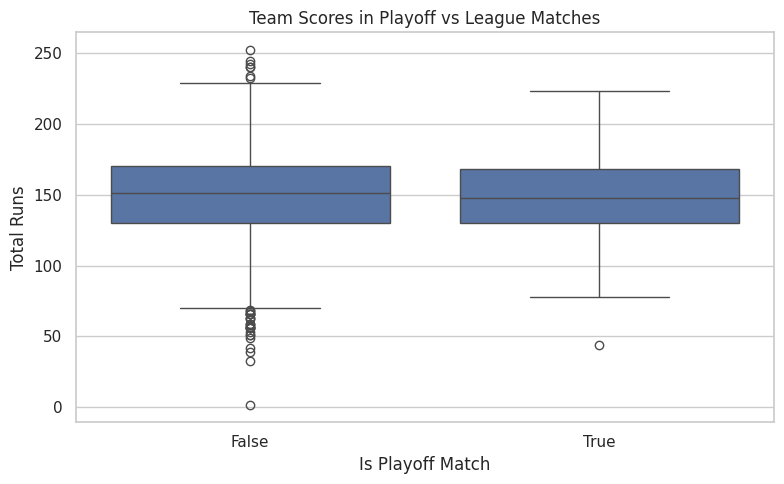

In [ ]:
sns.set(style="whitegrid")

# 1. Average Runs in Playoffs vs League Matches
plt.figure(figsize=(8, 5))

sns.boxplot(data=merged, x='is_playoff', y='total_runs')

plt.title("Team Scores in Playoff vs League Matches")
plt.xlabel("Is Playoff Match")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

In [ ]:
# Import required Library
from scipy.stats import mannwhitneyu

# Separate scores into two groups based on is_playoff flag
league_scores = merged[merged['is_playoff'] == False]['total_runs']
playoff_scores = merged[merged['is_playoff'] == True]['total_runs']

# Run the Mann-Whitney U test (non-parametric test for median differences)
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

# Display results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("✅ The difference in scores between playoffs and league matches is statistically significant.")
else:
    print("❌ No statistically significant difference in scores between playoffs and league matches.")

Mann-Whitney U Statistic: 124606.0
P-value: 0.7668706992141119
❌ No statistically significant difference in scores between playoffs and league matches.


In [ ]:
from scipy.stats import mannwhitneyu

# Choose your team (edit this)
team_name = "Chennai Super Kings"

# Filter only this team's matches
team_data = merged[merged['batting_team'] == team_name]

# Separate scores by match type
league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

# Print results
print(f"Team: {team_name}")
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("✅ This team shows a statistically significant scoring difference in playoffs vs league matches.")
else:
    print("❌ No statistically significant scoring difference in playoffs vs league matches for this team.")

Team: Chennai Super Kings
Mann-Whitney U Statistic: 2261.0
P-value: 0.3326928611823903
❌ No statistically significant scoring difference in playoffs vs league matches for this team.


In [ ]:
teams = merged['batting_team'].unique()

for team in teams:
    team_data = merged[merged['batting_team'] == team]
    league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
    playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

    if len(playoff_scores) >= 3 and len(league_scores) >= 3:  # avoid tiny samples
        u_stat, p_val = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
        print(f"{team}: p = {p_val:.4f} {'✅' if p_val < 0.05 else '❌'}")

Kolkata Knight Riders: p = 0.8206 ❌
Royal Challengers Bangalore: p = 0.4337 ❌
Chennai Super Kings: p = 0.3327 ❌
Kings XI Punjab: p = 0.6591 ❌
Delhi Daredevils: p = 0.0892 ❌
Rajasthan Royals: p = 0.8971 ❌
Mumbai Indians: p = 0.4349 ❌
Deccan Chargers: p = 0.0997 ❌
Sunrisers Hyderabad: p = 0.7162 ❌
Delhi Capitals: p = 0.9859 ❌
Gujarat Titans: p = 0.4976 ❌


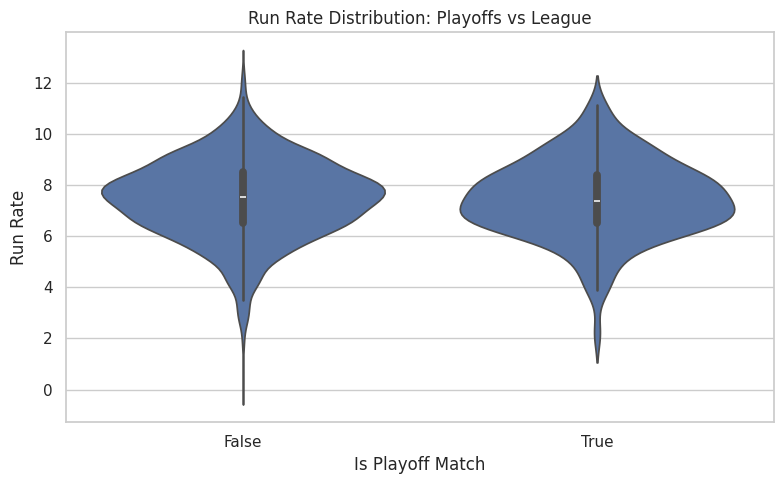

In [ ]:
# Run Rate Trends in Playoff vs League Matches
plt.figure(figsize=(8, 5))
sns.violinplot(data=merged, x='is_playoff', y='run_rate')
plt.title("Run Rate Distribution: Playoffs vs League")
plt.xlabel("Is Playoff Match")
plt.ylabel("Run Rate")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Step 2: Split the run rate data based on is_playoff
league_run_rates = merged[merged['is_playoff'] == False]['run_rate']
playoff_run_rates = merged[merged['is_playoff'] == True]['run_rate']

# Step 3: Run the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')

# Step 4: Print the results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Step 5: Interpret the result
if p_value < 0.05:
    print("✅ The difference in run rates between playoffs and league matches is statistically significant.")
else:
    print("❌ No statistically significant difference in run rates between playoffs and league matches.")

Mann-Whitney U Statistic: 124606.0
P-value: 0.7668706992141119
❌ No statistically significant difference in run rates between playoffs and league matches.


In [ ]:
# Create an empty list to store results
results = []

# Loop through each unique team
teams = merged['batting_team'].unique()

for team in teams:
    # Filter data for this team
    team_data = merged[merged['batting_team'] == team]

    # Separate run rates by match type
    league_run_rates = team_data[team_data['is_playoff'] == False]['run_rate']
    playoff_run_rates = team_data[team_data['is_playoff'] == True]['run_rate']

    # Ensure enough data points in each group to make a fair comparison
    if len(league_run_rates) >= 3 and len(playoff_run_rates) >= 3:
        # Perform the Mann-Whitney U test
        u_stat, p_val = mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')

        # Append the results
        results.append({
            'Team': team,
            'P-value': round(p_val, 4),
            'Significant': '✅' if p_val < 0.05 else '❌'
        })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                           Team  P-value Significant
0         Kolkata Knight Riders   0.8206           ❌
1   Royal Challengers Bangalore   0.4337           ❌
2           Chennai Super Kings   0.3327           ❌
3               Kings XI Punjab   0.6591           ❌
4              Delhi Daredevils   0.0892           ❌
5              Rajasthan Royals   0.8971           ❌
6                Mumbai Indians   0.4349           ❌
7               Deccan Chargers   0.0997           ❌
8           Sunrisers Hyderabad   0.7162           ❌
9                Delhi Capitals   0.9859           ❌
10               Gujarat Titans   0.4976           ❌


In [ ]:
# Home vs. Away flags
merged['home_team'] = merged['batting_team'] == merged['team1']
merged['away_team'] = merged['batting_team'] == merged['team2']

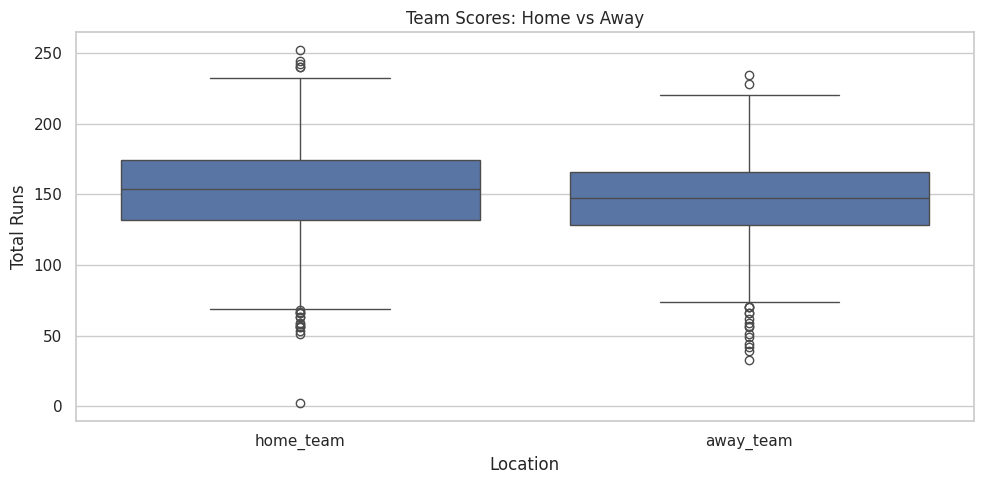

In [ ]:
# Average Runs for Home vs Away

# Melt the dataset to reshape for home vs away comparison
home_away_df = merged.melt(id_vars=['total_runs'], value_vars=['home_team', 'away_team'],
                           var_name='location', value_name='is_true')

# Filter for only the rows where the condition (home/away) is True
home_away_df = home_away_df[home_away_df['is_true']]

plt.figure(figsize=(10, 5))
sns.boxplot(data=home_away_df, x='location', y='total_runs')
plt.title("Team Scores: Home vs Away")
plt.xlabel("Location")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Extract the two groups
home_scores = merged[merged['home_team'] == True]['total_runs']
away_scores = merged[merged['away_team'] == True]['total_runs']

# Step 2: Run the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(home_scores, away_scores, alternative='two-sided')

# Step 3: Print the results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Step 4: Interpret the result
if p_value < 0.05:
    print("✅ The difference in scores between home and away matches is statistically significant.")
else:
    print("❌ No statistically significant difference in scores between home and away matches.")

Mann-Whitney U Statistic: 581106.0
P-value: 1.2376099361250964e-05
✅ The difference in scores between home and away matches is statistically significant.


In [ ]:
# Shows the number of missing values in each column

print("Number of missing values")
print(merged.isnull().sum())

#Check if Any missing value exist print("Check if Any missing value exist")
print(merged.isnull().any())

#Percent of missing values per column print("Percent of missing values per column")
missing_percent= merged.isnull().mean()*100
print(missing_percent)

# Show just the rows that have any missing data print("Show just the rows that have any missing data")
missing_rows=merged[merged.isnull().any(axis=1)]
print(missing_rows.head())

Number of missing values
match_id        0
batting_team    0
total_runs      0
date            0
venue           0
team1           0
team2           0
Period          0
run_rate        0
year            0
is_playoff      0
home_team       0
away_team       0
dtype: int64
match_id        False
batting_team    False
total_runs      False
date            False
venue           False
team1           False
team2           False
Period          False
run_rate        False
year            False
is_playoff      False
home_team       False
away_team       False
dtype: bool
match_id        0.0
batting_team    0.0
total_runs      0.0
date            0.0
venue           0.0
team1           0.0
team2           0.0
Period          0.0
run_rate        0.0
year            0.0
is_playoff      0.0
home_team       0.0
away_team       0.0
dtype: float64
Empty DataFrame
Columns: [match_id, batting_team, total_runs, date, venue, team1, team2, Period, run_rate, year, is_playoff, home_team, away_team]
Index: [

In [ ]:
#Handle missing values
merged.dropna (subset=['date', 'total_runs','run_rate'],inplace=True)

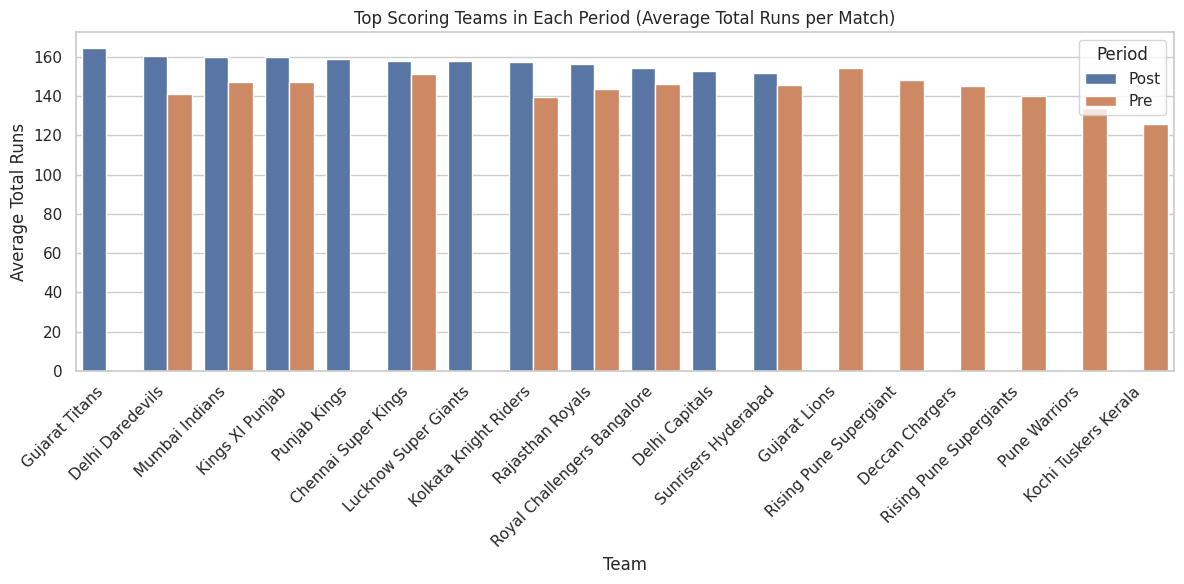

In [ ]:
# Group by team and period to calculate average total runs per match
top_scoring_teams = (
    merged.groupby(['batting_team', 'Period'])['total_runs']
    .mean()
    .reset_index()
    .sort_values(by=['Period', 'total_runs'], ascending=[True, False])
)

# Plot the results using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scoring_teams, x='batting_team', y='total_runs', hue='Period')

# Beautify the plot
plt.title("Top Scoring Teams in Each Period (Average Total Runs per Match)")
plt.ylabel("Average Total Runs")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

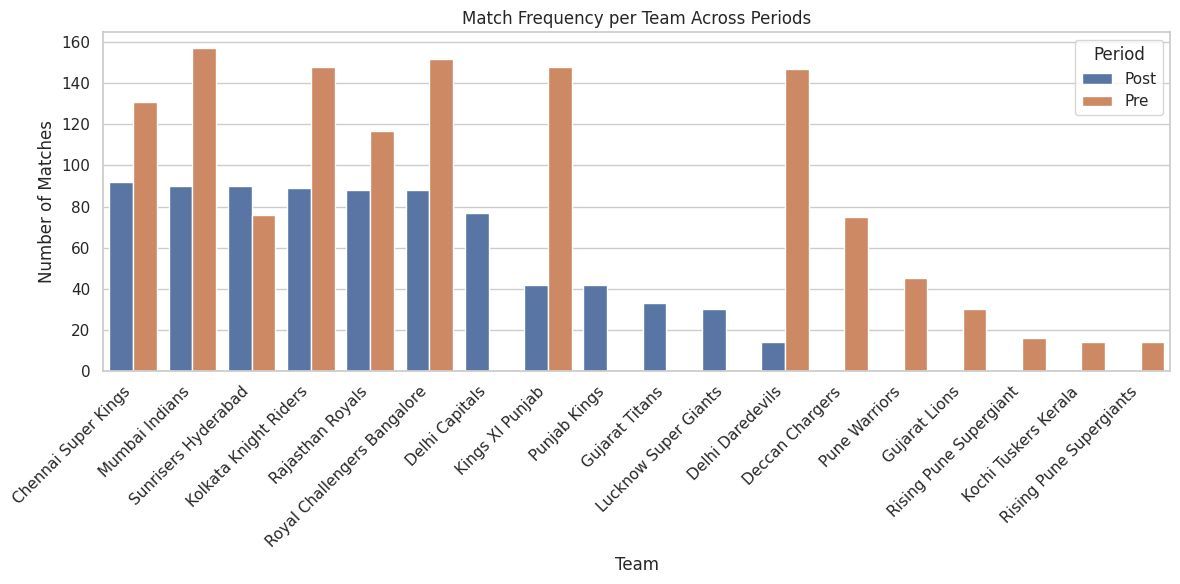

In [ ]:
# Step 1: Count number of matches per team per period
match_freq = (
    merged.groupby(['batting_team', 'Period'])['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'match_count'})
)

# Step 2: Sort for clarity (optional)
match_freq = match_freq.sort_values(by=['Period', 'match_count'], ascending=[True, False])

# Step 3: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=match_freq, x='batting_team', y='match_count', hue='Period')

# Step 4: Beautify the plot
plt.title("Match Frequency per Team Across Periods")
plt.ylabel("Number of Matches")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Set minimum matches required per period
min_matches = 10

# Step 1: Count matches per team per period
match_counts = (
    merged.groupby(['batting_team', 'Period'])['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'match_count'})
)

# Step 2: Pivot to get Pre and Post match counts in separate columns
match_counts_pivot = match_counts.pivot(index='batting_team', columns='Period', values='match_count').fillna(0)

# Step 3: Filter teams that meet minimum match criteria in both periods
qualified_teams = match_counts_pivot[
    (match_counts_pivot.get('Pre', 0) >= min_matches) &
    (match_counts_pivot.get('Post', 0) >= min_matches)
].index.tolist()

# Step 4: Filter original merged dataset to include only qualified teams
filtered_merged = merged[merged['batting_team'].isin(qualified_teams)]

# Display filtered team list and shape of filtered dataset
print("Qualified Teams:", qualified_teams)
print("Filtered Dataset Size:", filtered_merged.shape)

Qualified Teams: ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
Filtered Dataset Size: (1669, 13)


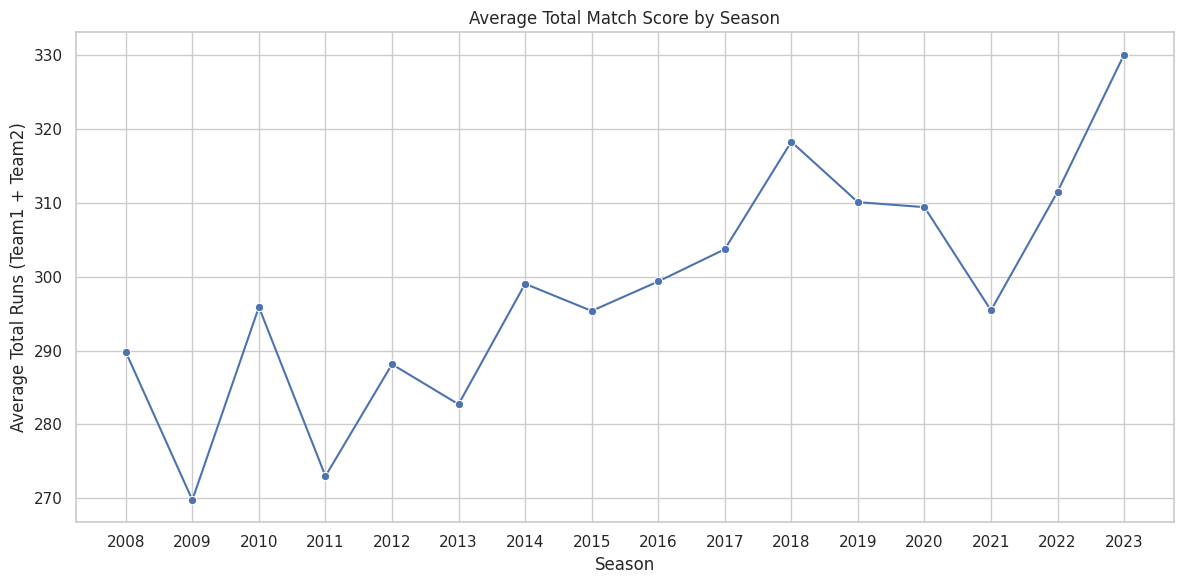

In [ ]:
# Step 1: Compute total runs by match_id and batting_team
match_totals = (
    merged.groupby(['match_id', 'batting_team'])['total_runs']
    .sum()
    .reset_index()
)

# Step 2: Sum both team totals to get the total score for each match
match_scores = (
    match_totals.groupby('match_id')['total_runs']
    .sum()
    .reset_index()
    .rename(columns={'total_runs': 'total_match_score'})
)

# Step 3: Merge with match_info to get the match date
match_info = match_info_data[['id', 'date']].copy()
match_info['date'] = pd.to_datetime(match_info['date'], errors='coerce')
match_info.rename(columns={'id': 'match_id'}, inplace=True)

# Merge scores with date info
match_scores = pd.merge(match_scores, match_info, on='match_id')

# ✅ Corrected line to extract year from date
match_scores['year'] = match_scores['date'].dt.year

# Step 5: Calculate average total match score per season
seasonal_scores = (
    match_scores.groupby('year')['total_match_score']
    .mean()
    .reset_index()
    .rename(columns={'total_match_score': 'avg_total_match_score'})
)

# Step 6: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_scores, x='year', y='avg_total_match_score', marker='o')
plt.title("Average Total Match Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Runs (Team1 + Team2)")
plt.xticks(seasonal_scores['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

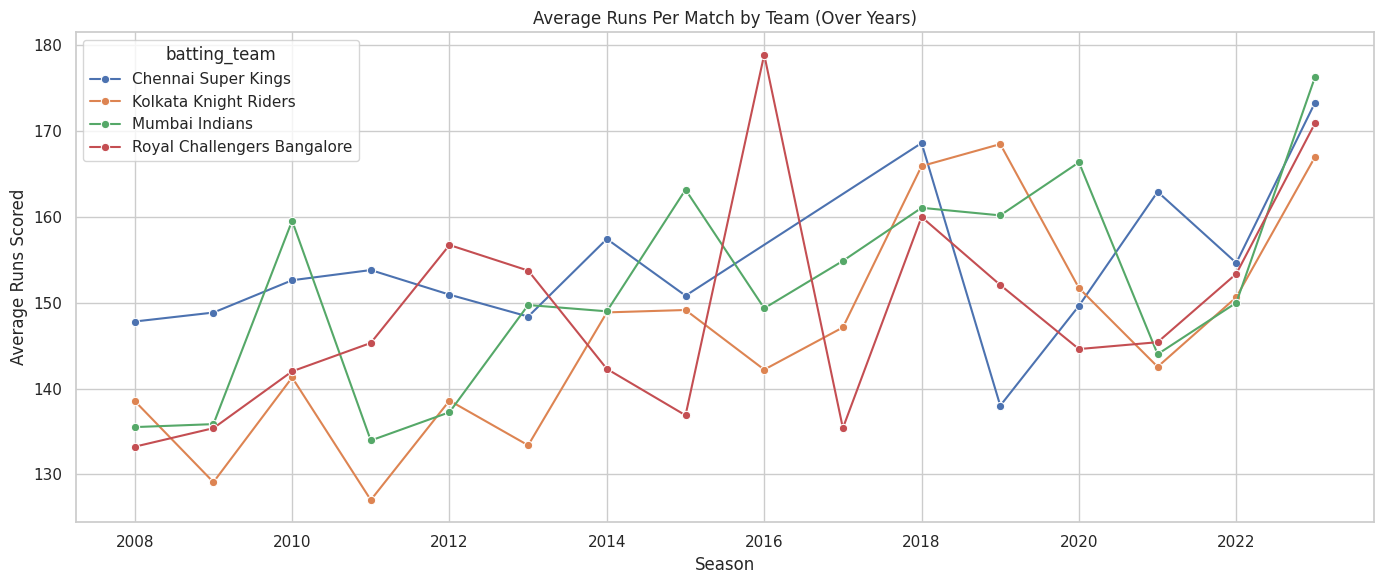

In [ ]:
# Compute average runs scored by each team per season
team_scores_by_year = (
    merged.groupby(['batting_team', 'year'])['total_runs']
    .mean()
    .reset_index()
    .rename(columns={'total_runs': 'avg_score'})
)

plt.figure(figsize=(14, 6))
top_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders']
sns.lineplot(data=team_scores_by_year[team_scores_by_year['batting_team'].isin(top_teams)],
             x='year', y='avg_score', hue='batting_team', marker='o')

plt.title("Average Runs Per Match by Team (Over Years)")
plt.xlabel("Season")
plt.ylabel("Average Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
print("Skewness of total_runs:", skew(merged['total_runs']))
print("Kurtosis of total_runs:", kurtosis(merged['total_runs']))

print("Skewness of run_rate:", skew(merged['run_rate']))
print("Kurtosis of run_rate:", kurtosis(merged['run_rate']))

# Convert boolean columns to int
merged['home_team_int'] = merged['home_team'].astype(int)
merged['away_team_int'] = merged['away_team'].astype(int)

# Correlation matrix
correlation_matrix = merged[['total_runs', 'run_rate', 'year', 'home_team_int', 'away_team_int']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Skewness of total_runs: -0.316126444960667
Kurtosis of total_runs: 0.597009096235078
Skewness of run_rate: -0.31612644496066417
Kurtosis of run_rate: 0.5970090962350754

Correlation Matrix:
               total_runs  run_rate      year  home_team_int  away_team_int
total_runs       1.000000  1.000000  0.208131       0.096941      -0.096941
run_rate         1.000000  1.000000  0.208131       0.096941      -0.096941
year             0.208131  0.208131  1.000000       0.000238      -0.000238
home_team_int    0.096941  0.096941  0.000238       1.000000      -1.000000
away_team_int   -0.096941 -0.096941 -0.000238      -1.000000       1.000000


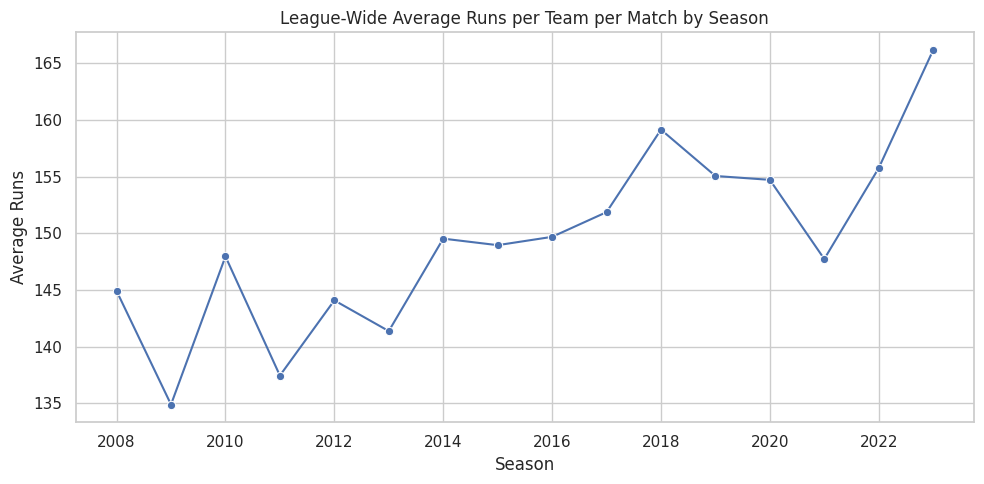

In [ ]:
# Step 1: Calculate league-wide average runs per team per match by season
seasonal_avg = merged.groupby('year')['total_runs'].mean().reset_index()

# Step 2: Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=seasonal_avg, x='year', y='total_runs', marker='o')

plt.title("League-Wide Average Runs per Team per Match by Season")
plt.xlabel("Season")
plt.ylabel("Average Runs")
plt.grid(True)
plt.tight_layout()
plt.show()

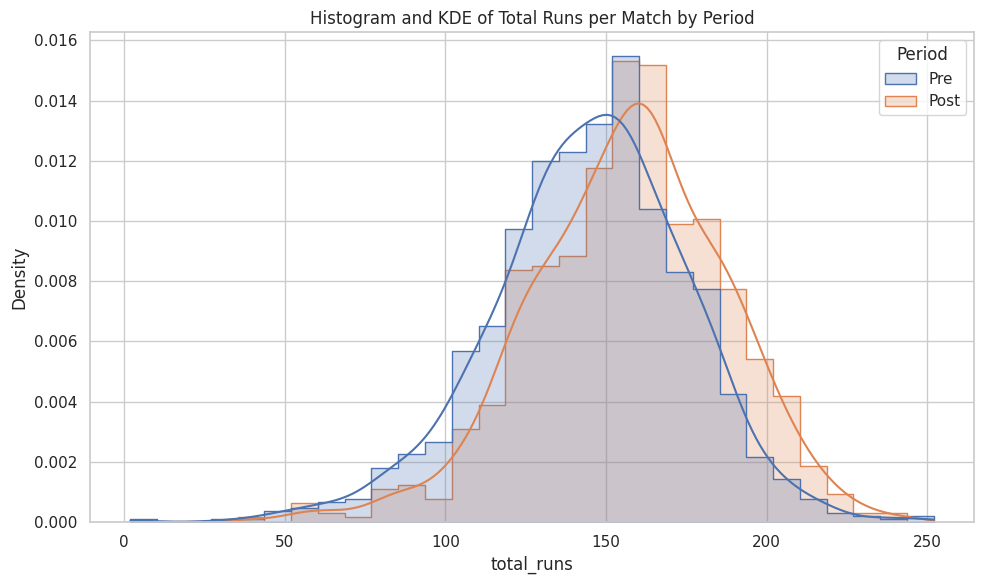

In [ ]:
#Distribution Plots
plt.figure(figsize=(10, 6))
sns.histplot(data=merged, x='total_runs', hue='Period', element='step', stat='density', common_norm=False, kde=True, bins=30)
plt.title("Histogram and KDE of Total Runs per Match by Period")
plt.tight_layout()
plt.show()

In [ ]:
u_stat, p_val = mannwhitneyu(pre_scores, post_scores, alternative='two-sided')
print("Mann-Whitney U Test: U-statistic =", u_stat, ", p-value =", p_val)

# Function to compute Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

# Compute effect size
effect_size = cohen_d(post_scores, pre_scores)
print("Cohen's d Effect Size:", effect_size)

Mann-Whitney U Test: U-statistic = 381621.5 , p-value = 1.454889995517028e-17
Cohen's d Effect Size: 0.3901739611740549


In [ ]:
def bootstrap_diff_means(x, y, n_bootstrap=1000):
    diffs = [np.mean(resample(y)) - np.mean(resample(x)) for _ in range(n_bootstrap)]
    return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

ci_bounds, mean_diff = bootstrap_diff_means(pre_scores, post_scores)

print("95% Confidence Interval:", ci_bounds, "\nMean Difference:",mean_diff)

95% Confidence Interval: [ 9.16758484 14.62235192] 
Mean Difference: 11.919132887985775


In [ ]:
# Linear Regression
seasonal_data = merged.groupby('year') ['total_runs'].mean().reset_index()
X = sm.add_constant(seasonal_data['year'])
y=seasonal_data['total_runs']
model=sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_runs   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     25.68
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           0.000172
Time:                        05:47:40   Log-Likelihood:                -47.087
No. Observations:                  16   AIC:                             98.17
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2569.0983    536.414     -4.789      0.0

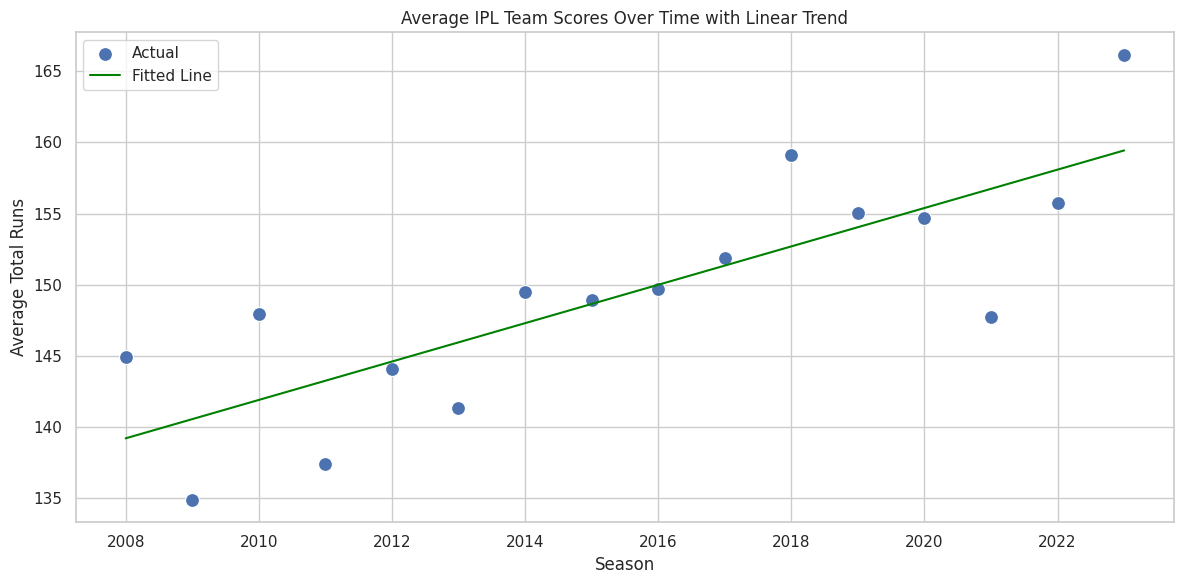

In [ ]:
# Predict values using the model
seasonal_data['predicted'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))

sns.scatterplot(data=seasonal_data, x='year', y='total_runs', label='Actual', s=100)

sns.lineplot(data=seasonal_data, x='year', y='predicted', label='Fitted Line', color='green')

plt.title('Average IPL Team Scores Over Time with Linear Trend')
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()